In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import category_encoders as ce

In [3]:
# Performance Report
def evaluate(y_test, y_pred):
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))

    print ("Accuracy : ")
    print(accuracy_score(y_test,y_pred)*100)

    print("Report : ")
    report = classification_report(y_test, y_pred)
    print(report)

In [5]:
data = pd.read_csv("bank.csv")

<h3>Preprocessing data</h3>

In [6]:
data.rename(columns={'subcribed': 'subscribed'}, inplace=True)

In [7]:
data = data.replace({'yes': 1, 'no': 0})

In [8]:
data['education'] = data['education'].replace({'tertiary': 1, 'secondary': 2, 'primary': 3, 'unknown': 4})

In [9]:
from datetime import datetime
data['month'] = data['month'].transform(lambda x : datetime.strptime(x, '%b').month)

In [10]:
X = data.drop(columns=['subscribed'])
y = data['subscribed']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

In [12]:
from sklearn.pipeline import Pipeline

encoding_pipeline = Pipeline([
    ('encode_others', ce.OneHotEncoder(cols=['marital', 'contact', 'poutcome'], use_cat_names=True, return_df=True)),
    ('encode_job', ce.JamesSteinEncoder(cols=['job'], return_df=True))
])

X_train = encoding_pipeline.fit_transform(X_train, y_train)

X_test = encoding_pipeline.transform(X_test)

In [13]:
X_train['job'].unique()

array([0.09141286, 0.11290891, 0.09707707, 0.13092087, 0.10710269,
       0.09733033, 0.13676432, 0.1237184 , 0.09924586, 0.15640936,
       0.17784496, 0.15272608])

<h3>Desicion Tree Model</h3>

In [39]:
tree_classifier = DecisionTreeClassifier(criterion="gini", random_state = 100, max_depth = 5, min_samples_leaf = 5)

tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
evaluate(y_test, y_pred)


Confusion Matrix: 
[[1192   23]
 [ 111   31]]
Accuracy : 
90.12527634487842
Report : 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1215
           1       0.57      0.22      0.32       142

    accuracy                           0.90      1357
   macro avg       0.74      0.60      0.63      1357
weighted avg       0.88      0.90      0.88      1357



In [41]:
feature_imp = pd.Series(tree_classifier.feature_importances_, index = X_train.columns).sort_values(ascending=False)[:10]
print(feature_imp)

duration            0.509618
poutcome_success    0.205249
age                 0.061424
education           0.047011
contact_unknown     0.035998
day                 0.033750
pdays               0.032276
previous            0.017612
loan                0.014488
campaign            0.013958
dtype: float64


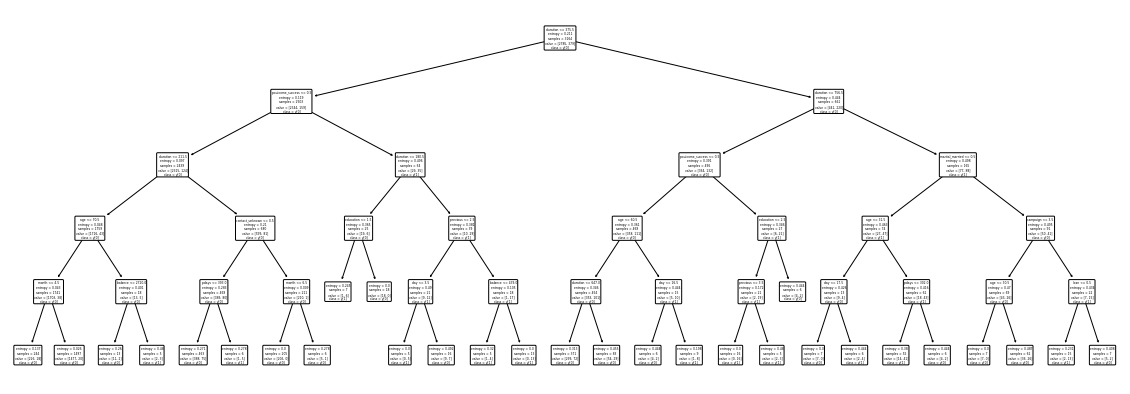

In [43]:
plt.figure(figsize=(20,7))

plot_tree(tree_classifier, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()